In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from statsmodels.stats.multitest import multipletests

In [2]:
df = pd.read_csv("300424.csv")
df

,date,strain,number,dots,cells
0,300424,795,1,18,93
1,300424,795,1,11,63
2,300424,795,1,15,78
3,300424,795,1,11,63
4,300424,795,2,18,96
5,300424,795,2,15,79
6,300424,795,2,12,94
7,300424,795,3,9,37
8,300424,795,3,11,44
9,300424,795,3,16,54


In [3]:
# calculate SE / cells (%)
df_number = df.groupby(["strain", "number"], as_index=False).sum()
df_number["SE"] = df_number["dots"] * 100 / df_number["cells"]
df_number

,strain,number,date,dots,cells,SE
0,795,1,1201696,55,297,18.518519
1,795,2,901272,45,269,16.728625
2,795,3,1201696,45,186,24.193548
3,1053,1,1201696,49,271,18.081181
4,1053,2,1201696,40,231,17.316017
5,1053,3,901272,33,220,15.000000
6,1055,1,901272,46,215,21.395349
7,1055,2,901272,31,229,13.537118
8,1055,3,1201696,43,281,15.302491


In [4]:
# calculate average and sem in different strains
# wt, atg2, atg9
SE_mean = df_number.groupby("strain").mean()["SE"]
SE_sem = df_number.groupby("strain").std()["SE"].values / np.sqrt(3)
print(SE_mean)
print(SE_sem)

strain
795     19.813564
1053    16.799066
1055    16.744986
Name: SE, dtype: float64
[2.25012065 0.9262555  2.38037405]


## Welth's t-test collected with Holm-sidak

In [5]:
WT_SE = df_number[df_number["strain"] == 795]["SE"]
atg2_SE = df_number[df_number["strain"] == 1053]["SE"]
atg9_SE = df_number[df_number["strain"] == 1055]["SE"]

In [6]:
statistic, atg2_pvalue = stats.ttest_ind(WT_SE, atg2_SE, equal_var=False)
atg2_pvalue

0.31352951635530596

In [7]:
statistic, atg9_pvalue = stats.ttest_ind(WT_SE, atg9_SE, equal_var=False)
atg9_pvalue

0.40204856320519955

In [8]:
multipletests(pvals=[atg2_pvalue, atg9_pvalue], alpha=0.05, method="holm-sidak")

(array([False, False]),
 array([0.52875828, 0.52875828]),
 0.025320565519103555,
 0.025)

## figure

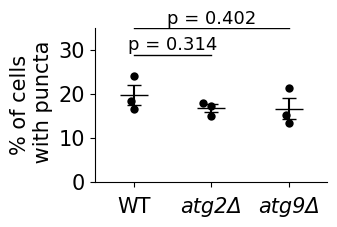

In [9]:
y = -7
fontsize=15
fig, ax = plt.subplots(figsize = (3, 2), dpi=100)
sns.swarmplot(x="strain", y="SE", data=df_number.iloc[:9], size=6, color="black")
ax.errorbar(x=[0, 1, 2], y=SE_mean[0:3], yerr=SE_sem[0:3], capsize=5, fmt='_', ecolor='k', ms=20, mfc='None', mec='k')
# label of each strains
ax.text(0, y, "WT", ha="center", fontsize=fontsize)
ax.text(1, y, "atg2Δ", ha="center", fontstyle="italic", fontsize=fontsize)
ax.text(2, y, "atg9Δ", ha="center", fontstyle="italic", fontsize=fontsize)
# frame
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.plot([0, 1], [29, 29], color='k', lw=1)
ax.text(0.5, 30, f'p = {atg2_pvalue:.3f}', ha='center', fontsize=fontsize-2)
ax.plot([0, 2], [35, 35], color='k', lw=1)
ax.text(1, 36, f'p = {atg9_pvalue:.3f}', ha='center', fontsize=fontsize-2)

# x and y axis
ax.set_xticklabels("")
ax.set_xlabel("")
ax.set_ylim(0, 35)
ax.set_xlim(-0.5, 2.5)
ax.set_yticks([0, 10, 20, 30])
ax.set_yticklabels(["0", "10", "20", "30"], fontsize=fontsize)
ax.set_ylabel("% of cells\n with puncta", fontsize=fontsize, loc="center")

fig.savefig("output.jpg", bbox_inches="tight")